In [2]:
DATADIR = (r'E:\HUSNAIN AKBAR KHAN\Machine Learning projects\Lung_Cancer_Detection_using_VGG16\lung_colon_image_set\lung_image_sets\LungCancer')
CATEGORIES = ['lung_adenocarcinomas', 'lung_normal', 'lung_squamous_cell_carcinomas']

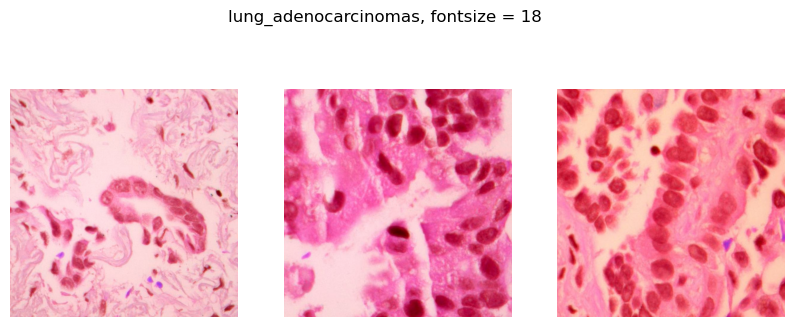

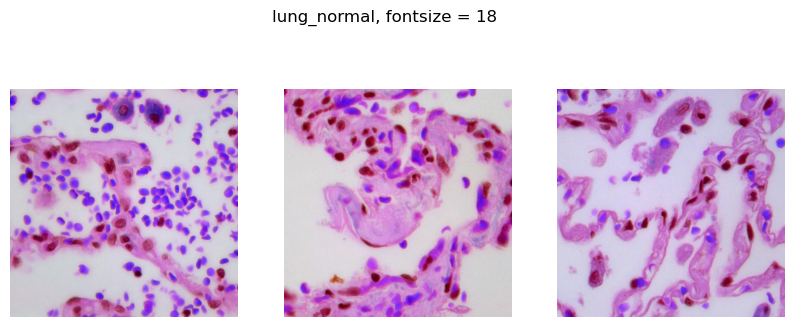

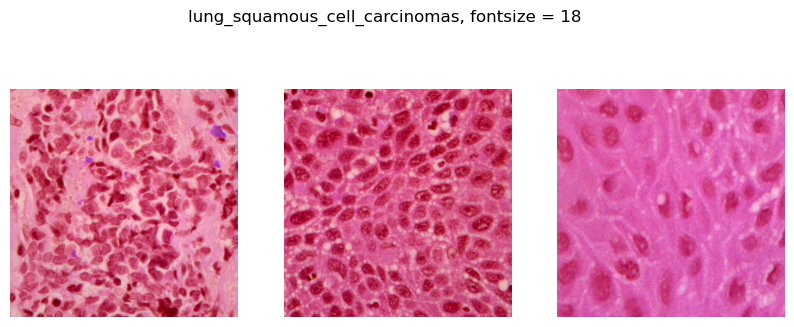

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  images = os.listdir(path)

  fig, ax = plt.subplots(1, 3, figsize = (10, 4))
  fig.suptitle(f'{category}, fontsize = 18')

  for i in range(3):
    img_name = images[np.random.randint(0, len(images))]
    img_path = os.path.join(path, img_name)
    img_array = cv2.imread(img_path)

    ax[i].imshow(img_array)
    ax[i].axis('off')


In [4]:
img_array.shape

(768, 768, 3)

In [5]:
IMG_SIZE = 224
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

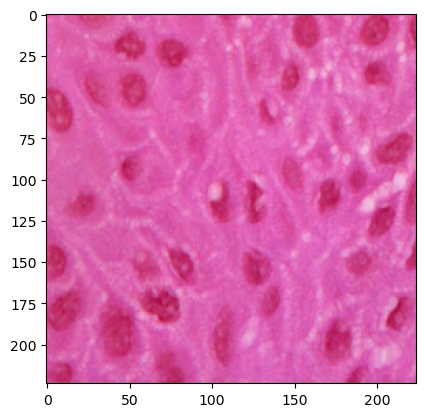

In [6]:
plt.imshow(new_array)

In [7]:
new_array.shape

(224, 224, 3)

In [8]:
training_data = []

def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    labels = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, labels])
      except Exception as e:
        pass
create_train_data()

In [9]:
len(training_data)

15000

In [10]:
X = []
y = []

for features, labels in training_data:
  X.append(features)
  y.append(labels)

In [11]:
type(X) , type(y)

(list, list)

In [12]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [13]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
print(f'X_train length : {X_train.shape[0]}, X_train image size : {X_train.shape[1:3]}, X_train channels : {X_train.shape[3]}')
print(f'X_test length : {X_test.shape[0]}, X_test image size : {X_test.shape[1:3]}, X_test channels : {X_test.shape[3]}')

X_train length : 12000, X_train image size : (224, 224), X_train channels : 3
X_test length : 3000, X_test image size : (224, 224), X_test channels : 3


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import vgg16

In [25]:
vgg = vgg16.VGG16(weights = 'imagenet', include_top = False, input_shape = (IMG_SIZE, IMG_SIZE, 3))

In [26]:
for layer in vgg.layers:
  layer.trainable = False

In [27]:
model = keras.Sequential([
    vgg,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

In [28]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2545s 7s/step - accuracy: 0.8884 - loss: 0.7111
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2158s 6s/step - accuracy: 0.9790 - loss: 0.0580
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1834s 5s/step - accuracy: 0.9821 - loss: 0.0489
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1982s 5s/step - accuracy: 0.9867 - loss: 0.0359
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1716s 5s/step - accuracy: 0.9908 - loss: 0.0276


In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'loss : {loss}, accuracy : {accuracy* 100}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 420s 4s/step - accuracy: 0.9365 - loss: 0.1532
loss : 0.14803524315357208, accuracy : 93.99999976158142


In [31]:
pred = np.argmax(model.predict(X_test), axis = -1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 433s 5s/step


In [32]:
pred

array([0, 1, 2, ..., 0, 2, 2], dtype=int64)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1037
           1       1.00      1.00      1.00       970
           2       1.00      0.82      0.90       993

    accuracy                           0.94      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.95      0.94      0.94      3000



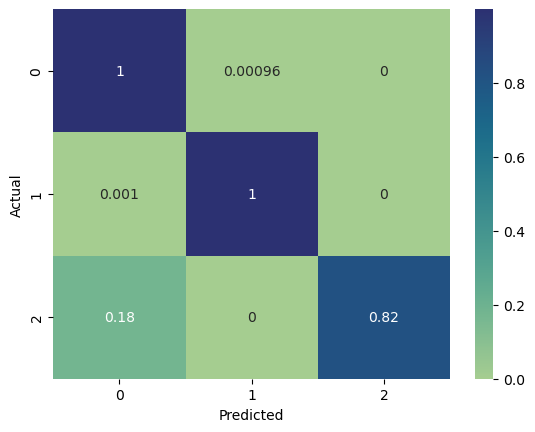

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

cf = confusion_matrix(y_test, pred, normalize='true')

sns.heatmap(cf, annot=True, cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()